In [1]:
import numpy as np 
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import linear_model
%precision 3
%matplotlib inline

In [2]:
X = pd.read_csv('sample/7-3-1-large-data.csv')
X.head(3)

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,...,X_91,X_92,X_93,X_94,X_95,X_96,X_97,X_98,X_99,X_100
0,1.0000,0.5000,0.3333,0.2500,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,...,0.0110,0.0109,0.0108,0.0106,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100
1,0.5000,0.3333,0.2500,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,0.0909,...,0.0109,0.0108,0.0106,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100,0.0099
2,0.3333,0.2500,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,0.0909,0.0833,...,0.0108,0.0106,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100,0.0099,0.0098


In [3]:
sp.mean(X.X_1)

0.037272

In [4]:
sp.mean(X, axis=0).head(3)

X_1    0.037272
X_2    0.030649
X_3    0.027360
dtype: float64

In [5]:
X -= sp.mean(X,axis=0)
X /= sp.std(X,ddof=1,axis=0)

In [6]:
sp.mean(X,axis=0).head(3).round(3)

X_1    0.0
X_2   -0.0
X_3   -0.0
dtype: float64

In [7]:
sp.std(X,ddof=1,axis=0).head(3)

X_1    1.0
X_2    1.0
X_3    1.0
dtype: float64

In [8]:
np.random.seed(1)
noise = sp.stats.norm.rvs(loc=0, scale=1, size=X.shape[0])
y = X.X_1 * 5 + noise

In [9]:
large_data = pd.concat([pd.DataFrame({'y':y}),X],axis=1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


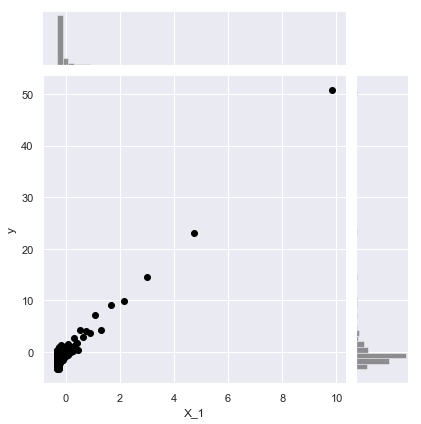

In [10]:
sns.jointplot(y='y', x='X_1', data=large_data, color='black')

In [13]:
lm_statsmodels = sm.OLS(endog=y, exog=X).fit()
lm_statsmodels.params.head(3)

X_1     14.755018
X_2    -87.462851
X_3    211.743136
dtype: float64

In [14]:
lm_sklearn = linear_model.LinearRegression()
lm_sklearn.fit(X,y)
lm_sklearn.coef_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_base.py:533: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


array([ 1.476e+01, -8.746e+01,  2.117e+02, -9.415e+01, -6.817e+01,
       -9.284e+01,  1.761e+00,  8.170e+01,  6.680e+01,  2.788e+01,
       -3.288e+01,  6.818e+01, -1.699e+01,  2.208e+01, -4.855e+01,
       -3.390e+01, -4.536e+01,  9.728e+00,  2.481e+01,  1.858e+00,
        1.599e+00, -2.838e+01,  6.477e+00, -5.980e+01,  3.532e+01,
       -1.302e+01,  4.108e+01, -4.303e+01,  5.247e+01,  1.920e+00,
        3.342e+01,  8.490e+00,  8.329e+00, -2.293e+01, -3.577e+01,
       -1.337e+01,  3.178e+01, -2.018e+01, -2.654e+01, -3.523e+01,
        1.927e+01,  4.823e+01, -1.655e+00,  5.749e-01, -1.893e+01,
        7.370e-01,  1.047e+01, -7.732e+00, -1.854e+00, -2.559e-01,
       -5.045e+00, -4.227e+00,  2.523e+01,  1.616e+01, -1.310e+01,
        6.455e+00, -1.332e+01, -2.291e+01, -1.202e+01,  7.745e+00,
        1.755e+01,  5.997e+00,  4.648e+00,  4.120e+00, -1.825e+00,
        5.366e+00,  4.546e+00, -2.598e+00, -4.091e+00,  7.496e+00,
        3.100e+01,  1.530e+01, -5.323e+00, -1.509e+01, -3.801e

In [15]:
n_alphas = 50
ridge_alphas = np.logspace(-2, 0.7, n_alphas)

In [16]:
sp.log10(ridge_alphas)

array([-2.   , -1.945, -1.89 , -1.835, -1.78 , -1.724, -1.669, -1.614,
       -1.559, -1.504, -1.449, -1.394, -1.339, -1.284, -1.229, -1.173,
       -1.118, -1.063, -1.008, -0.953, -0.898, -0.843, -0.788, -0.733,
       -0.678, -0.622, -0.567, -0.512, -0.457, -0.402, -0.347, -0.292,
       -0.237, -0.182, -0.127, -0.071, -0.016,  0.039,  0.094,  0.149,
        0.204,  0.259,  0.314,  0.369,  0.424,  0.48 ,  0.535,  0.59 ,
        0.645,  0.7  ])

In [17]:
ridge_coefs = []
for a in ridge_alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X,y)
    ridge_coefs.append(ridge.coef_)

In [18]:
ridge_coefs = np.array(ridge_coefs)
ridge_coefs.shape

(50, 100)

Text(0, 0.5, 'Coefficients')

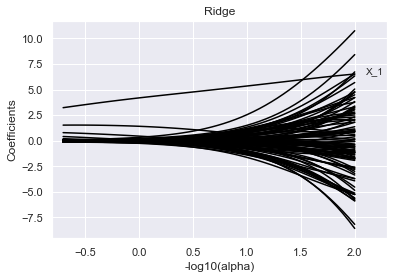

In [20]:
log_alphas = -sp.log10(ridge_alphas)
plt.plot(log_alphas, ridge_coefs, color='black')
plt.text(max(log_alphas)+0.1 , np.array(ridge_coefs)[0,0],'X_1')
plt.xlim([min(log_alphas)-0.1, max(log_alphas)+0.3])
plt.title('Ridge')
plt.xlabel('-log10(alpha)')
plt.ylabel('Coefficients')

In [22]:
ridge_best = linear_model.RidgeCV(cv=10,alphas=ridge_alphas,fit_intercept=False)
ridge_best.fit(X,y)
-sp.log10(ridge_best.alpha_)

0.23673469387755094

In [23]:
ridge_best.alpha_

0.5797827717179138

In [24]:
ridge_best.coef_

array([ 4.463,  1.288,  0.293, -0.091, -0.201, -0.233, -0.215, -0.206,
       -0.145, -0.135, -0.155, -0.046, -0.097, -0.017, -0.11 , -0.012,
       -0.094,  0.013, -0.018, -0.031,  0.025, -0.029,  0.043, -0.087,
        0.127,  0.021,  0.055, -0.077,  0.141, -0.007,  0.099,  0.116,
       -0.044,  0.037, -0.034,  0.015,  0.123, -0.171, -0.007, -0.182,
        0.09 ,  0.222,  0.035, -0.032, -0.008,  0.025,  0.338, -0.193,
       -0.108,  0.212, -0.128, -0.246,  0.249,  0.128, -0.155,  0.27 ,
        0.03 , -0.165, -0.178,  0.158, -0.011,  0.013,  0.194,  0.134,
       -0.156, -0.018,  0.256,  0.223, -0.185,  0.006,  0.535,  0.181,
       -0.348, -0.123,  0.226, -0.043, -0.115, -0.053,  0.209,  0.189,
       -0.042, -0.205, -0.099,  0.059, -0.224,  0.15 , -0.039, -0.113,
        0.21 ,  0.012,  0.129, -0.032, -0.022, -0.229, -0.198,  0.245,
       -0.305, -0.396, -0.163,  0.164])

In [25]:
lasso_alphas, lasso_coefs, _ = linear_model.lasso_path(X,y,fit_intercept=False)

Text(0, 0.5, 'Coefficients')

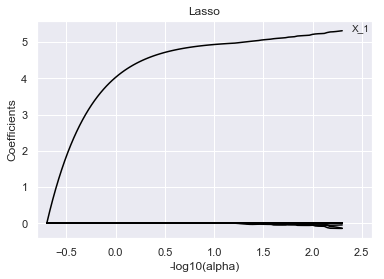

In [27]:
log_alphas = -sp.log10(lasso_alphas)
plt.plot(log_alphas,lasso_coefs.T,color='black')
plt.text(max(log_alphas)+0.1,lasso_coefs[0,-1],'X_1')
plt.xlim([min(log_alphas)-0.1, max(log_alphas)+0.3])
plt.title('Lasso')
plt.xlabel('-log10(alpha)')
plt.ylabel('Coefficients')

In [29]:
lasso_best = linear_model.LassoCV(
cv = 10, alphas = lasso_alphas, fit_intercept = False)
lasso_best.fit(X,y)
-sp.log10(lasso_best.alpha_)

2.301043177767326

In [30]:
lasso_best.alpha_

0.004999848237729944

In [31]:
lasso_best.coef_

array([ 5.336e+00, -0.000e+00, -0.000e+00, -3.043e-01, -4.121e-02,
       -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00,
       -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00,
       -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00,
       -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00,
       -0.000e+00, -0.000e+00, -0.000e+00,  0.000e+00, -0.000e+00,
        0.000e+00,  0.000e+00, -0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00, -0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        8.425e-03,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e

In [32]:
# chapter4

In [33]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
%precision 3

'%.3f'

In [34]:
iris = load_iris()

In [36]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [37]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [41]:
X = iris.data[50:150,0:2]
y = iris.target[50:150]
X.shape, y.shape

((100, 2), (100,))

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=2)
print(X_train.shape)
print(y_train.shape)

(75, 2)
(75,)


In [43]:
y_train[0:10]

array([1, 1, 2, 2, 2, 2, 1, 1, 1, 1])

In [44]:
X_train_df = pd.DataFrame(X_train, columns=['sepal_len','sepal_wid'])
y_train_df = pd.DataFrame({'species':y_train-1})
iris_train_df = pd.concat([y_train_df,X_train_df],axis=1)
print(iris_train_df.head(3))

   species  sepal_len  sepal_wid
0        0        5.7        2.8
1        0        6.6        3.0
2        1        6.1        3.0


In [49]:
logi_mod_full = smf.glm(
'species ~ sepal_len + sepal_wid',data=iris_train_df, family=sm.families.Binomial()).fit()
logi_mod_len = smf.glm(
'species ~ sepal_len', data = iris_train_df, family=sm.families.Binomial()).fit()

In [50]:
logi_mod_wid = smf.glm(
'species ~ sepal_wid', data = iris_train_df, family=sm.families.Binomial()).fit()

In [51]:
logi_mod_null = smf.glm(
'species ~ 1', data=iris_train_df, family=sm.families.Binomial()).fit()

In [52]:
print(logi_mod_full.aic.round(3))
print(logi_mod_len.aic.round(3))
print(logi_mod_wid.aic.round(3))
print(logi_mod_null.aic.round(3))

76.813
76.234
92.768
105.318


In [53]:
logi_mod_len.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-16.4152,4.000,-4.104,0.000,-24.256,-8.575
sepal_len,2.6478,0.639,4.142,0.000,1.395,3.901


In [55]:
X_test_df = pd.DataFrame(X_test, columns = ['sepal_len', 'sepal_wid'])
logi_fit = logi_mod_len.fittedvalues.round(0)
logi_pred = logi_mod_len.predict(X_test_df).round(0)

In [57]:
true_train = sp.sum(logi_fit==(y_train-1))
true_test = sp.sum(logi_pred==(y_test-1))
result_train = true_train / len(y_train)
result_test = true_test / len(y_test)

In [61]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
sp.std(X_train_scales, axis=0)

array([1., 1.])

In [62]:
sp.std(X_test_scaled, axis=0)

array([0.74 , 0.679])

In [63]:
nnet = MLPClassifier(
hidden_layer_sizes=(100,100),
alpha=0.07,
max_iter=10000,
random_state=0)
nnet.fit(X_train_scaled,y_train)

MLPClassifier(activation='relu', alpha=0.07, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [64]:
print(nnet.score(X_train_scaled,y_train))
print(nnet.score(X_test_scaled,y_test))

0.8933333333333333
0.68
